In [15]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

type(data)

import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data']) # converts the raw json into a data frame

In [16]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,11799,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19782331.00000,19782331.00000,False,NaN,1,NaN,NaN,None,2024-11-15T06:03:00.000Z,87798.03323,86274512462.41501,-26.60950,0.33891,-2.55368,15.53125,30.77237,49.73891,48.38147,1736849754482.33472,59.84020,1843758697806.09009,None,2024-11-15T06:03:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,9551,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120420610.94805,120420610.94805,True,NaN,2,NaN,NaN,None,2024-11-15T06:03:00.000Z,3062.22830,34960657880.80808,-26.53980,1.08742,-5.07025,4.76265,17.01119,33.70940,17.72004,368755402541.22815,12.70480,368755402541.22998,None,2024-11-15T06:03:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether USDt,USDT,tether,103525,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,127284508523.66338,129835400280.00836,True,NaN,3,NaN,NaN,None,2024-11-15T06:03:00.000Z,1.00030,182869375486.18359,-24.53820,0.00631,-0.02361,-0.02754,0.04881,0.03775,0.00187,127322945857.46672,4.38530,129874607931.25999,None,2024-11-15T06:03:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,5426,Solana,SOL,solana,787,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,471972758.32861,588321453.00593,True,NaN,4,NaN,NaN,None,2024-11-15T06:04:00.000Z,208.85458,7687249831.31139,-29.81660,1.33608,-4.60853,4.83262,35.49130,59.26945,49.64317,98573673408.95979,3.39630,122873631464.37000,None,2024-11-15T06:04:00.000Z,NaN,NaN,NaN,NaN,NaN
4,1839,BNB,BNB,bnb,2281,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,144098949.80878,144098949.80878,False,NaN,5,NaN,NaN,None,2024-11-15T06:04:00.000Z,617.43166,3416726358.32475,8.95730,0.87644,-2.47408,3.01030,4.24215,12.84390,18.09280,88971253159.22633,3.06360,88971253159.23000,None,2024-11-15T06:04:00.000Z,NaN,NaN,NaN,NaN,NaN
5,74,Dogecoin,DOGE,dogecoin,1100,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,146797256383.70523,146797256383.70523,True,NaN,6,NaN,NaN,None,2024-11-15T06:03:00.000Z,0.36626,16116894590.69517,-29.64110,2.11453,-7.24465,84.17480,209.64434,259.59395,262.94761,53765875401.39450,1.85240,53765875401.39000,None,2024-11-15T06:03:00.000Z,NaN,NaN,NaN,NaN,NaN
6,52,XRP,XRP,xrp,1424,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,56931242174.00000,99987013354.00000,False,NaN,7,NaN,NaN,None,2024-11-15T06:04:00.000Z,0.80955,11126449662.48279,72.35030,0.11792,16.21015,47.04550,49.23585,41.24979,43.15121,46088699298.06002,1.58740,80955021422.50999,None,2024-11-15T06:04:00.000Z,NaN,NaN,NaN,NaN,NaN
7,3408,USDC,USDC,usd-coin,23076,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,36758611561.31523,36758611561.31523,False,NaN,8,NaN,NaN,None,2024-11-15T06:03:00.000Z,0.99990,14468562912.43360,-21.99830,-0.00071,-0.00304,0.01221,-0.00479,-0.00485,-0.00870,36754979520.94856,1.26590,36754979520.95000,None,2024-11-15T06:03:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
8,2010,Cardano,ADA,cardano,1349,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35018528521.67706,44994940907.64097,False,NaN,

In [17]:
df['timestamp'] = pd.to_datetime('now') # time that you run this

In [18]:
def api_runner():
    global df6;
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    df2 = pd.json_normalize(data['data']) # converts the raw json into a data frame
    df2['timestamp'] = pd.to_datetime('now') # time that you run this
    df = df2; # pd.concat([df6, df2], axis=0) would work if df6 had something in it

    if not os.path.isfile(r"C:\Users\ryzen\OneDrive\Alex the analyst data analyst playlist practice\Python\Crypto API read/API.csv"):
        df.to_csv(r"C:\Users\ryzen\OneDrive\Alex the analyst data analyst playlist practice\Python\Crypto API read/API.csv", header="column_names")
    else:
        df.to_csv(r"C:\Users\ryzen\OneDrive\Alex the analyst data analyst playlist practice\Python\Crypto API read/API.csv", mode="a", header=False)

In [20]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('api runner completed successfully')
    sleep(2) # sleeps for 60 seconds
exit()

api runner completed successfully
api runner completed successfully
api runner completed successfully


KeyboardInterrupt: 

In [ ]:
pd.set_option("display.float_format", lambda x: "%.5f" % x) # presents floats instead of scientific notation
df

In [23]:
df = df.groupby("name", sort=False)[["quote.USD.volume_change_24h", "quote.USD.percent_change_1h"]].mean()
df

,quote.USD.volume_change_24h,quote.USD.percent_change_1h
name,,
Bitcoin,-26.60950,0.33891
Ethereum,-26.53980,1.08742
Tether USDt,-24.53820,0.00631
Solana,-29.81660,1.33608
BNB,8.95730,0.87644
Dogecoin,-29.64110,2.11453
XRP,72.35030,0.11792
USDC,-21.99830,-0.00071
Cardano,-9.25080,3.01822


In [24]:
df = df.stack()
df

name                                    
Bitcoin      quote.USD.volume_change_24h   -26.60950
             quote.USD.percent_change_1h     0.33891
Ethereum     quote.USD.volume_change_24h   -26.53980
             quote.USD.percent_change_1h     1.08742
Tether USDt  quote.USD.volume_change_24h   -24.53820
             quote.USD.percent_change_1h     0.00631
Solana       quote.USD.volume_change_24h   -29.81660
             quote.USD.percent_change_1h     1.33608
BNB          quote.USD.volume_change_24h     8.95730
             quote.USD.percent_change_1h     0.87644
Dogecoin     quote.USD.volume_change_24h   -29.64110
             quote.USD.percent_change_1h     2.11453
XRP          quote.USD.volume_change_24h    72.35030
             quote.USD.percent_change_1h     0.11792
USDC         quote.USD.volume_change_24h   -21.99830
             quote.USD.percent_change_1h    -0.00071
Cardano      quote.USD.volume_change_24h    -9.25080
             quote.USD.percent_change_1h     3.01822
TRON 

In [26]:
type(df) # series now

pandas.core.series.Series

In [27]:
df = df.to_frame(name="values")

In [29]:
df # now data frame

values
name                                             
Bitcoin     quote.USD.volume_change_24h -26.60950
            quote.USD.percent_change_1h   0.33891
Ethereum    quote.USD.volume_change_24h -26.53980
            quote.USD.percent_change_1h   1.08742
Tether USDt quote.USD.volume_change_24h -24.53820
            quote.USD.percent_change_1h   0.00631
Solana      quote.USD.volume_change_24h -29.81660
            quote.USD.percent_change_1h   1.33608
BNB         quote.USD.volume_change_24h   8.95730
            quote.USD.percent_change_1h   0.87644
Dogecoin    quote.USD.volume_change_24h -29.64110
            quote.USD.percent_change_1h   2.11453
XRP         quote.USD.volume_change_24h  72.35030
            quote.USD.percent_change_1h   0.11792
USDC        quote.USD.volume_change_24h -21.99830
            quote.USD.percent_change_1h  -0.00071
Cardano     quote.USD.volume_change_24h  -9.25080
            quote.USD.percent_change_1h   3.01822
TRON        quote.USD.volume_change_24h  -5.44240
            quote.USD.percent_change_1h   0.69110
Shiba Inu   quote.USD.volume_change_24h -42.07490
            quote.USD.percent_change_1h   2.26727
Toncoin     quote.USD.volume_change_24h -13.60660
            quote.USD.percent_change_1h   0.87196
Avalanche   quote.USD.volume_change_24h -40.16420
            quote.USD.percent_change_1h   1.69726
Sui         quote.USD.volume_change_24h -34.90000
            quote.USD.percent_change_1h   1.68923
Pepe        quote.USD.volume_change_24h -45.49370
            quote.USD.percent_change_1h   1.04094

In [30]:
# can do the following for numbering of rows -> index = pd.Index(range(# rows)) and then on the next line df.set_index(index), will remove other indexes
df = df.reset_index() # works if internally calculates row numbers

In [31]:
df

,name,level_1,values
0,Bitcoin,quote.USD.volume_change_24h,-26.60950
1,Bitcoin,quote.USD.percent_change_1h,0.33891
2,Ethereum,quote.USD.volume_change_24h,-26.53980
3,Ethereum,quote.USD.percent_change_1h,1.08742
4,Tether USDt,quote.USD.volume_change_24h,-24.53820
5,Tether USDt,quote.USD.percent_change_1h,0.00631
6,Solana,quote.USD.volume_change_24h,-29.81660
7,Solana,quote.USD.percent_change_1h,1.33608
8,BNB,quote.USD.volume_change_24h,8.95730
9,BNB,quote.USD.percent_change_1h,0.87644


In [32]:
df = df.rename(columns={'level_1': 'percent_change'})
df

,name,percent_change,values
0,Bitcoin,quote.USD.volume_change_24h,-26.60950
1,Bitcoin,quote.USD.percent_change_1h,0.33891
2,Ethereum,quote.USD.volume_change_24h,-26.53980
3,Ethereum,quote.USD.percent_change_1h,1.08742
4,Tether USDt,quote.USD.volume_change_24h,-24.53820
5,Tether USDt,quote.USD.percent_change_1h,0.00631
6,Solana,quote.USD.volume_change_24h,-29.81660
7,Solana,quote.USD.percent_change_1h,1.33608
8,BNB,quote.USD.volume_change_24h,8.95730
9,BNB,quote.USD.percent_change_1h,0.87644


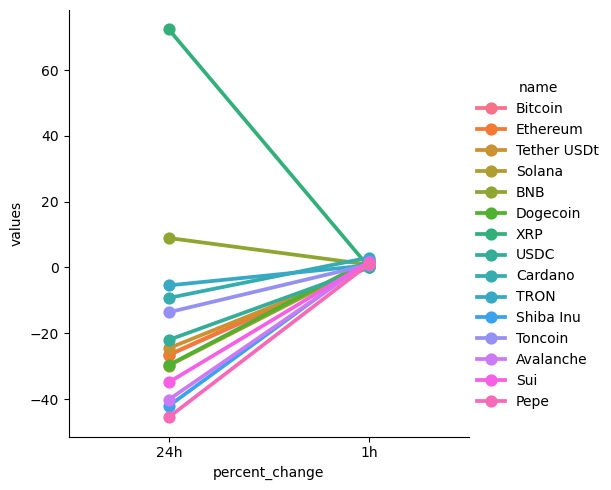

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

df['percent_change'] = df['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.volume_change_24h'], ['1h', '24h'])

sns.catplot(x='percent_change', y='values', hue='name', data=df, kind='point')

In [43]:
df = df[['name', 'values']] # only those columns
df = df.query("name == 'Ethereum'")
df

,name,values
2,Ethereum,-26.53980
3,Ethereum,1.08742


<Axes: xlabel='name', ylabel='values'>

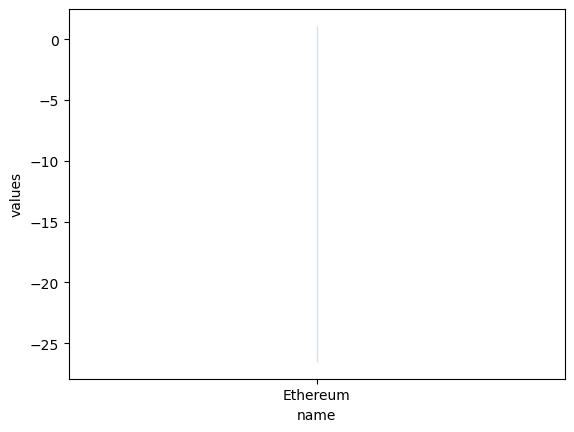

In [45]:
sns.lineplot(x='name', y='values', data = df)